In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [2]:

data=pd.read_csv("diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

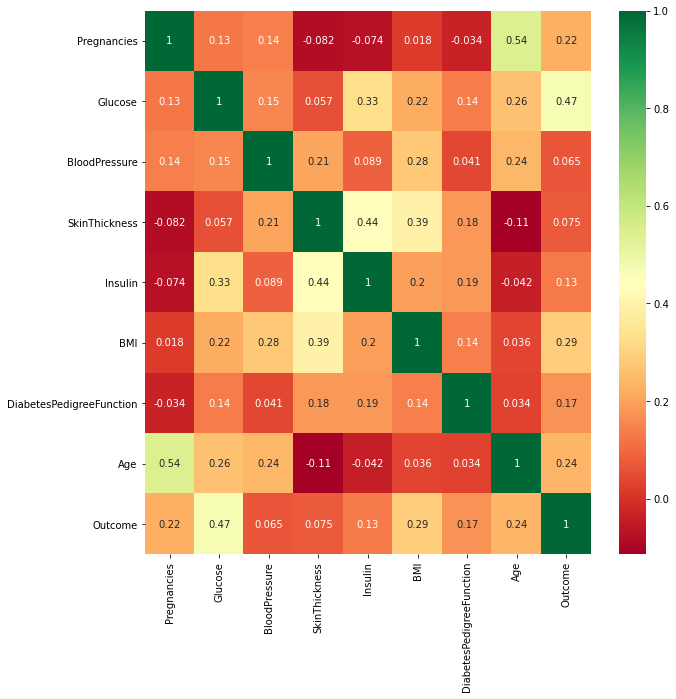

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# get correlations of each pair of features in the data
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))

# plot heat map
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [8]:
y=data.Outcome
X=data.drop('Outcome',axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 32,stratify=data.Outcome)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [11]:
rfc=RandomForestClassifier(random_state=0,n_jobs =-1)

In [12]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [13]:
y_pred=rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[92  8]
 [26 28]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       100
           1       0.78      0.52      0.62        54

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.78      0.77       154

0.7792207792207793


In [15]:
import pickle
#save the model to disk
filename = 'finalized_model'
pickle.dump(rfc, open(filename, 'wb'))

In [16]:
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

In [20]:
rfc.predict_proba([[2,160,120,23,32,35.5029585798817,0.37,55]])

array([[0.21, 0.79]])

In [21]:
rfc.predict([[2,160,120,23,32,35.5029585798817,0.37,55]])

array([1], dtype=int64)

In [22]:
rfc.predict_proba([[0,90,90,23,32,32.8719723183391,0.37,25]])

array([[0.96, 0.04]])

In [23]:
rfc.predict([[0,90,90,23,32,32.8719723183391,0.37,25]])

array([0], dtype=int64)

In [25]:
rfc.feature_importances_

array([0.09215219, 0.26199037, 0.08893902, 0.06801599, 0.06898849,
       0.15086199, 0.11850053, 0.15055142])

# Boosting


In [ ]:
# import xgboost as xgb
# from sklearn import metrics
# xgclf = xgb.XGBClassifier()

# xgclf.fit(X_train, y_train)

In [ ]:
# print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
#                                                               y_score=xgclf.predict_proba(X_train)[:, 1]))
# print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
#                                                              y_score=xgclf.predict_proba(X_test)[:, 1]))

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# y_pred=xgclf.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

In [ ]:
# # trying some hyper parameter tuning
# xgb_model = xgb.XGBClassifier()
# parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
#               'max_depth': [0,1,2, 4, 6, 8, 10],
#               'min_child_weight': [0,1,3, 7, 11, 15],
#               'n_estimators': [100, 150, 200, 300]}

# scorer = metrics.make_scorer(metrics.roc_auc_score,
#                              greater_is_better=True,
#                              needs_proba=True,
#                              needs_threshold=False)

# clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
#                                        param_grid=parameters,
#                                        n_jobs=-1,
#                                        cv=2,
#                                        scoring=scorer,
#                                        refit=True,verbose=-1)

# clf_xgb.fit(X_train, y_train)

In [ ]:
# print(clf_xgb.best_params_)
# print(clf_xgb.best_score_)
# print(clf_xgb.best_estimator_)

In [ ]:
# xgclf=clf_xgb.best_estimator_

In [ ]:
# y_pred=xgclf.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))